<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/8_Linear_Regression_with_Genes_and_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

### Imports

In [ ]:
import pandas as pd # pandas (DataFrames)
import seaborn as sns # graphs
import statsmodels.formula.api as smf # regression models
# installing and importing the custom diagnostics module
%pip install git+https://github.com/tb-harris/diagnostics.git
from diagnostics import LinearRegDiagnostic

  Cloning https://github.com/tb-harris/diagnostics.git to /tmp/pip-req-build-4x5sl26l
  Running command git clone --filter=blob:none --quiet https://github.com/tb-harris/diagnostics.git /tmp/pip-req-build-4x5sl26l
  Resolved https://github.com/tb-harris/diagnostics.git to commit 63e7ed899813d387d104118e3b35d435b398c0df
  Preparing metadata (setup.py) ... done
  Created wheel for diagnostics: filename=diagnostics-0.1-py3-none-any.whl size=4726 sha256=272ab432a0d58f200c4d8af22936ed9aaf1b6e44a97a7376edcdc57c4bf60910
  Stored in directory: /tmp/pip-ephem-wheel-cache-1jqkth1c/wheels/dc/6f/7f/5d7dbbdace3319b3bc68e42a4691a9f8e3605e00b9f8b8ce2b
Successfully built diagnostics


In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read in our data

In [ ]:
cell_metadata = pd.read_csv("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/20200711_patchseq_metadata_mouse.csv", index_col="cell_specimen_id")

rna_data = pd.read_hdf("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/gene_counts_ppm.hdf5.lz4")

morph_additional = pd.read_csv(
    "/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/morph_features_expanded.csv",
    index_col="cell_specimen_id"
)

morph_positional = pd.read_csv(
    "/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/morph_features_positional.csv",
    index_col="cell_specimen_id"
)

### See what features we have

In [ ]:
morph_additional.columns.to_list()

['basal_dendrite.compartment.dimension.width',
 'basal_dendrite.compartment.dimension.height',
 'basal_dendrite.compartment.dimension.depth',
 'axon.compartment.dimension.width',
 'axon.compartment.dimension.height',
 'axon.compartment.dimension.depth',
 'all_neurites.compartment.dimension.width',
 'all_neurites.compartment.dimension.height',
 'all_neurites.compartment.dimension.depth',
 'dendrite.compartment.dimension.width',
 'dendrite.compartment.dimension.height',
 'dendrite.compartment.dimension.depth',
 'basal_dendrite.node.dimension.width',
 'basal_dendrite.node.dimension.height',
 'basal_dendrite.node.dimension.depth',
 'axon.node.dimension.width',
 'axon.node.dimension.height',
 'axon.node.dimension.depth',
 'all_neurites.node.dimension.width',
 'all_neurites.node.dimension.height',
 'all_neurites.node.dimension.depth',
 'dendrite.node.dimension.width',
 'dendrite.node.dimension.height',
 'dendrite.node.dimension.depth',
 'basal_dendrite.tip.dimension.width',
 'basal_dendrite.

<Axes: xlabel='max_path_distance', ylabel='Count'>

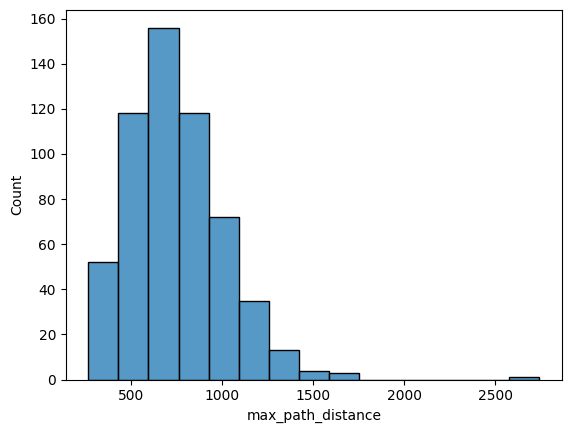

In [ ]:
sns.histplot(morph_additional["max_path_distance"], bins=15)

### Join our morphology and rna data into one Dataframe

First, we'll subset our morphology data to only include the cells with a **full** reconstruction (both axons and dendrites). Then, we'll join the morphology and rna dataframes.

In [ ]:
morph_full_recon = morph_additional[cell_metadata["neuron_reconstruction_type"] == "full"]
morph_full_recon.head()

/tmp/ipython-input-6-4170662234.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morph_full_recon = morph_additional[cell_metadata["neuron_reconstruction_type"] == "full"]


,basal_dendrite.compartment.dimension.width,basal_dendrite.compartment.dimension.height,basal_dendrite.compartment.dimension.depth,axon.compartment.dimension.width,axon.compartment.dimension.height,axon.compartment.dimension.depth,all_neurites.compartment.dimension.width,all_neurites.compartment.dimension.height,all_neurites.compartment.dimension.depth,dendrite.compartment.dimension.width,...,axon.apical_dendrite.overlap.below,dendrite.apical_dendrite.overlap.above,dendrite.apical_dendrite.overlap.overlap,dendrite.apical_dendrite.overlap.below,apical_dendrite.apical_dendrite.overlap.above,apical_dendrite.apical_dendrite.overlap.overlap,apical_dendrite.apical_dendrite.overlap.below,basal_dendrite.apical_dendrite.overlap.above,basal_dendrite.apical_dendrite.overlap.overlap,basal_dendrite.apical_dendrite.overlap.below
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,393.011953,747.217014,324.394559,393.011953,747.217014,324.394559,393.011953,747.217014,324.394559,393.011953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601790961,436.481395,739.597302,448.951762,436.481395,739.597302,448.951762,436.481395,739.597302,448.951762,436.481395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601803754,569.131172,297.353005,366.175379,569.131172,297.353005,366.175379,569.131172,297.353005,366.175379,569.131172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601808698,448.197547,564.142798,246.138535,448.197547,564.142798,246.138535,448.197547,564.142798,246.138535,448.197547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601810307,374.681297,367.082523,336.596647,374.681297,367.082523,336.596647,374.681297,367.082523,336.596647,374.681297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gene_morph = morph_full_recon.join(rna_data)
gene_morph

,basal_dendrite.compartment.dimension.width,basal_dendrite.compartment.dimension.height,basal_dendrite.compartment.dimension.depth,axon.compartment.dimension.width,axon.compartment.dimension.height,axon.compartment.dimension.depth,all_neurites.compartment.dimension.width,all_neurites.compartment.dimension.height,all_neurites.compartment.dimension.depth,dendrite.compartment.dimension.width,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,393.011953,747.217014,324.394559,393.011953,747.217014,324.394559,393.011953,747.217014,324.394559,393.011953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601790961,436.481395,739.597302,448.951762,436.481395,739.597302,448.951762,436.481395,739.597302,448.951762,436.481395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601803754,569.131172,297.353005,366.175379,569.131172,297.353005,366.175379,569.131172,297.353005,366.175379,569.131172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601808698,448.197547,564.142798,246.138535,448.197547,564.142798,246.138535,448.197547,564.142798,246.138535,448.197547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601810307,374.681297,367.082523,336.596647,374.681297,367.082523,336.596647,374.681297,367.082523,336.596647,374.681297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992386952,493.047489,310.661181,344.522588,493.047489,310.661181,344.522588,493.047489,310.661181,344.522588,493.047489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992830261,639.644822,504.596497,304.063285,639.644822,504.596497,304.063285,639.644822,504.596497,304.063285,639.644822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993243528,321.073575,469.492798,237.768992,321.073575,469.492798,237.768992,321.073575,469.492798,237.768992,321.073575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
gene_morph.shape

(528, 45948)

## A little bit of exploratory data analysis

Interested in max euclidean distance and max path distance

Possible gene associations:
* Camk
* Calm1

Scatterplot comparing Atp1b1 and max_euclidean_distance

<Axes: xlabel='mean_contraction', ylabel='Count'>

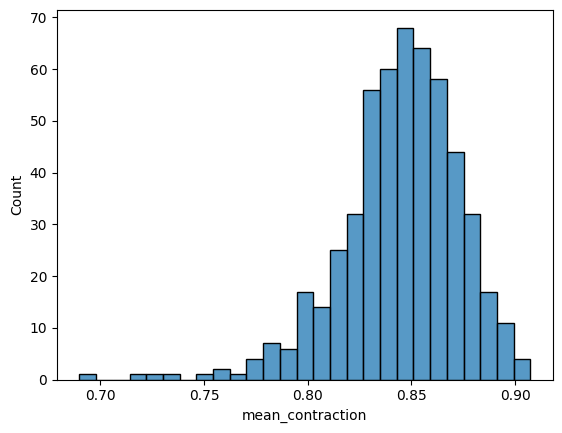

In [ ]:
sns.histplot(gene_morph["mean_contraction"])

<Axes: xlabel='Rbfox1', ylabel='mean_contraction'>

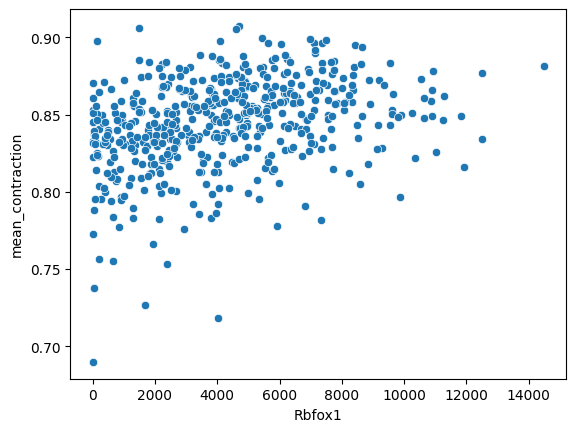

In [ ]:
sns.scatterplot(data=gene_morph, x="Rbfox1", y="mean_contraction")

In [ ]:
model = smf.ols(data=gene_morph, formula="Q('mean_contraction') ~ Rbfox1").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('mean_contraction')   R-squared:                       0.107
Model:                               OLS   Adj. R-squared:                  0.105
Method:                    Least Squares   F-statistic:                     63.00
Date:                   Thu, 17 Jul 2025   Prob (F-statistic):           1.26e-14
Time:                           13:05:31   Log-Likelihood:                 1152.7
No. Observations:                    527   AIC:                            -2301.
Df Residuals:                        525   BIC:                            -2293.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8307      0.002    391.710      0.000       0.826       0.835
Rbfox1      3.353e-06   4.22e-07      7.937      0.000    2.52e-06    4.18e-06
==============================================================================
Omnibus:                       94.441   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.448
Skew:                          -0.946   Prob(JB):                     4.47e-47
Kurtosis:                       5.479   Cond. No.                     8.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Linear Regression

We have a group of genes on the Camk pathway that we are interested in. We'll start by making a list of them and checking their correlations with each other

<Axes: >

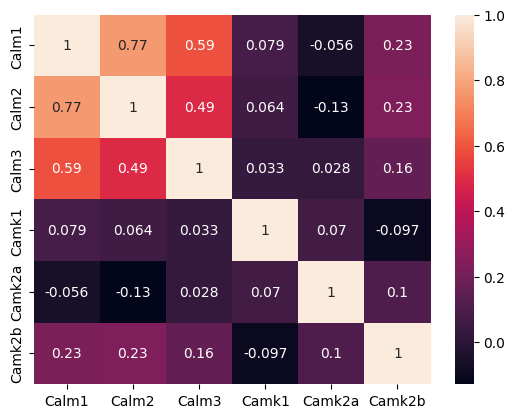

In [ ]:
camk_pathway = ['Calm1', 'Calm2', 'Calm3', "Camk1", "Camk2a", "Camk2b"]
sns.heatmap(gene_morph[camk_pathway].corr(), annot=True)

In [ ]:
gene_morph[camk_pathway].describe()

,Calm1,Calm2,Calm3,Camk1,Camk2a,Camk2b
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,1058.566573,926.842646,115.873891,155.285031,257.390473,184.643593
std,668.190683,631.134663,95.126533,120.863095,236.320253,136.916748
min,108.395737,1.502241,0.000000,0.000000,0.000000,0.000000
25%,628.144941,511.247908,49.427318,63.403341,101.255041,82.453701
50%,882.068855,733.974637,92.415118,135.107134,203.951814,162.164071
75%,1334.122723,1153.135834,151.910729,225.168255,338.545432,251.045876
max,4934.483498,3697.395972,617.074127,805.344675,1678.992540,827.845304


### Multiple Linear Regression Model

In [ ]:
model_camk = smf.ols(data=gene_morph, formula="Q('dendrite.total_length') ~ Calm1 + Calm2 + Calm3 + Camk1 + Camk2a + Camk2b").fit()
model_camk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q('dendrite.total_length')   R-squared:                       0.037
Model:                                    OLS   Adj. R-squared:                  0.026
Method:                         Least Squares   F-statistic:                     3.355
Date:                        Thu, 17 Jul 2025   Prob (F-statistic):            0.00298
Time:                                13:05:31   Log-Likelihood:                -4406.6
No. Observations:                         527   AIC:                             8827.
Df Residuals:                             520   BIC:                             8857.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2829.2652    123.281     22.950      0.000    2587.076    3071.455
Calm1          0.1741      0.114      1.523      0.128      -0.050       0.399
Calm2         -0.0674      0.114     -0.591      0.555      -0.292       0.157
Calm3          1.0957      0.594      1.844      0.066      -0.072       2.263
Camk1          0.2029      0.382      0.531      0.595      -0.547       0.953
Camk2a         0.4523      0.198      2.287      0.023       0.064       0.841
Camk2b        -0.5817      0.348     -1.671      0.095      -1.266       0.102
==============================================================================
Omnibus:                       65.600   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.964
Skew:                           0.869   Prob(JB):                     6.50e-21
Kurtosis:                       4.101   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Screen